In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('fake_job_postings.csv')
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null  object
 16  func

In [4]:
df.describe()

,job_id,telecommuting,has_company_logo,has_questions,fraudulent
count,17880.000000,17880.000000,17880.000000,17880.000000,17880.000000
mean,8940.500000,0.042897,0.795302,0.491723,0.048434
std,5161.655742,0.202631,0.403492,0.499945,0.214688
min,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4470.750000,0.000000,1.000000,0.000000,0.000000
50%,8940.500000,0.000000,1.000000,0.000000,0.000000
75%,13410.250000,0.000000,1.000000,1.000000,0.000000
max,17880.000000,1.000000,1.000000,1.000000,1.000000


In [5]:
df.shape

(17880, 18)

In [6]:
df.isnull().sum()

job_id                     0
title                      0
location                 346
department             11547
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
dtype: int64

# Location

In [7]:
df['location'].nunique()

3105

In [8]:
df['location'].head(20)

0             US, NY, New York
1               NZ, , Auckland
2                US, IA, Wever
3           US, DC, Washington
4           US, FL, Fort Worth
5                     US, MD, 
6               DE, BE, Berlin
7        US, CA, San Francisco
8            US, FL, Pensacola
9              US, AZ, Phoenix
10         US, NJ, Jersey City
11             GB, LND, London
12            US, CT, Stamford
13             US, FL, Orlando
14             AU, NSW, Sydney
15           SG, 01, Singapore
16      IL, , Tel Aviv, Israel
17    GB, SOS, Southend-on-Sea
18            US, NY, New York
19       US, PA, USA Northeast
Name: location, dtype: object

In [9]:
df[['country', 'state', 'city']] = df['location'].str.split(',', n = 2, expand=True).apply(lambda col:col.str.strip())

In [10]:
df.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,...,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent,country,state,city
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,...,0,Other,Internship,NaN,NaN,Marketing,0,US,NY,New York
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,...,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0,NZ,,Auckland
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,...,0,NaN,NaN,NaN,NaN,NaN,0,US,IA,Wever
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,...,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0,US,DC,Washington
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,...,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0,US,FL,Fort Worth


In [11]:
df = df.drop(columns=['location'])

In [12]:
df.shape

(17880, 20)

In [13]:
df['country'].isnull().sum()

346

In [14]:
df['state'].isnull().sum()

440

In [15]:
df['city'].isnull().sum()

440

#### We are keeping the null values of the location, because it is a signal of fraud job posting 
##### Missingness is information.

# Department

In [16]:
df['department'].nunique()

1337

In [17]:
df['department'].isnull().sum()

11547

In [18]:
df['department'].describe()

count      6333
unique     1337
top       Sales
freq        551
Name: department, dtype: object

In [ ]:
df['department'] = df['department'].fillna('Unknown')

In [20]:
df['department'].isnull().sum()

0

Missingness indicator

In [ ]:
df['missing_department'] = (df['department'] == 'Unknown').astype(int)

Department values are usually very high-cardinality and noisy.

Therefore grouping rare categories

In [ ]:
top_departments = df['department'].value_counts().nlargest(20).index
df['department'] = df['department'].where(df['department'].isin(top_departments), 'Other')

Department cardinality is reduced from 1337 to 21. It has kept top 20 departments and rest all as others.

In [23]:
df['department'].unique()

array(['Marketing', 'Other', 'Unknown', 'Sales', 'HR', 'Design',
       'Engineering', 'IT', 'Client Services', 'Operations', 'tech',
       'R&D', 'Development', 'Technology', 'Finance', 'Retail', 'Product',
       'Creative', 'Information Technology', 'Customer Service',
       'Product Development'], dtype=object)

Fraud job posting by missing departments

In [24]:
df.groupby('missing_department')['fraudulent'].count()

missing_department
0     6332
1    11548
Name: fraudulent, dtype: int64

In [25]:
df.isnull().sum()

job_id                     0
title                      0
department                 0
salary_range           15012
company_profile         3308
description                1
requirements            2695
benefits                7210
telecommuting              0
has_company_logo           0
has_questions              0
employment_type         3471
required_experience     7050
required_education      8105
industry                4903
function                6455
fraudulent                 0
country                  346
state                    440
city                     440
missing_department         0
dtype: int64

# Salary range

In [26]:
df['salary_range'].unique()

array([nan, '20000-28000', '100000-120000', '120000-150000',
       '50000-65000', '40000-50000', '60-80', '65000-70000', '75-115',
       '75000-110000', '17000-20000', '16000-28000', '95000-115000',
       '15000-18000', '50000-70000', '45000-60000', '30000-40000',
       '70000-90000', '10000-14000', '50-110', '28000-45000', '0-34300',
       '35000-40000', '9-Dec', '44000-57000', '18500-28000',
       '55000-75000', '30000-35000', '0-0', '20000-40000',
       '360000-600000', '50000-80000', '80000-100000', '52000-78000',
       '15750-15750', '40000-65000', '45000-50000', '30000-37000',
       '45000-67000', '35000-100000', '180000-216000', '45000-65000',
       '28000-32000', '0-1000', '36000-40000', '80000-110000',
       '35000-73000', '19000-19000', '60000-120000', '120000-15000000',
       '42000-55000', '90000-120000', '100000-150000', '28000-38000',
       '1600-1700', '50000-60000', '30000-70000', '32000-40000', '50-100',
       '9000-17000', '23040-28800', '105-110', '1300

In [ ]:
salary_split = df['salary_range'].str.split('-', n=1, expand=True)

df['salary_lower_raw'] = salary_split[0].str.strip()
df['salary_upper_raw'] = salary_split[1].str.strip()

In [ ]:
#Missing salary flag
df['salary_missing_flag'] = df['salary_range'].isna().astype(int)

In [ ]:
#Non-numeric salary flags
df['salary_lower_non_numeric'] = (
    df['salary_lower_raw'].notna() &
    ~df['salary_lower_raw'].str.fullmatch(r'\d+', na=False)
).astype(int)

df['salary_upper_non_numeric'] = (
    df['salary_upper_raw'].notna() &
    ~df['salary_upper_raw'].str.fullmatch(r'\d+', na=False)
).astype(int)


In [ ]:
#Convert to numeric
df['salary_lower'] = pd.to_numeric(df['salary_lower_raw'], errors='coerce')
df['salary_upper'] = pd.to_numeric(df['salary_upper_raw'], errors='coerce')

In [ ]:
# Salary too low
df['salary_too_low_flag'] = (
    (df['salary_upper'] < 1000) &
    df['salary_upper'].notna()
).astype(int)

In [ ]:
# Identical lower & upper bound
df['salary_equal_bounds_flag'] = (
    (df['salary_lower'] == df['salary_upper']) &
    df['salary_lower'].notna()
).astype(int)

In [ ]:
# Mixed scale range
df['salary_mixed_scale_flag'] = (
    (df['salary_lower'] < 1000) &
    (df['salary_upper'] > 50000)
).astype(int)

In [ ]:
# Unrealistically high salary
df['salary_too_high_flag'] = (
    df['salary_upper'] > 500000
).astype(int)

In [ ]:
# Invalid range order (lower > upper)
df['salary_invalid_order_flag'] = (
    (df['salary_lower'] > df['salary_upper']) &
    df['salary_lower'].notna() &
    df['salary_upper'].notna()
).astype(int)

In [ ]:
# Composite Salary Fraud Signal
salary_flags = [
    'salary_missing_flag',
    'salary_lower_non_numeric',
    'salary_upper_non_numeric',
    'salary_too_low_flag',
    'salary_equal_bounds_flag',
    'salary_mixed_scale_flag',
    'salary_too_high_flag',
    'salary_invalid_order_flag'
]

df['salary_fraud_signal_count'] = df[salary_flags].sum(axis=1)

In [37]:
df.shape

(17880, 34)

In [38]:
df.columns

Index(['job_id', 'title', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'country', 'state', 'city', 'missing_department',
       'salary_lower_raw', 'salary_upper_raw', 'salary_missing_flag',
       'salary_lower_non_numeric', 'salary_upper_non_numeric', 'salary_lower',
       'salary_upper', 'salary_too_low_flag', 'salary_equal_bounds_flag',
       'salary_mixed_scale_flag', 'salary_too_high_flag',
       'salary_invalid_order_flag', 'salary_fraud_signal_count'],
      dtype='object')

In [39]:
df.head()

,job_id,title,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,...,salary_lower_non_numeric,salary_upper_non_numeric,salary_lower,salary_upper,salary_too_low_flag,salary_equal_bounds_flag,salary_mixed_scale_flag,salary_too_high_flag,salary_invalid_order_flag,salary_fraud_signal_count
0,1,Marketing Intern,Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,...,0,0,NaN,NaN,0,0,0,0,0,1
1,2,Customer Service - Cloud Video Production,Other,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,...,0,0,NaN,NaN,0,0,0,0,0,1
2,3,Commissioning Machinery Assistant (CMA),Unknown,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,...,0,0,NaN,NaN,0,0,0,0,0,1
3,4,Account Executive - Washington DC,Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,...,0,0,NaN,NaN,0,0,0,0,0,1
4,5,Bill Review Manager,Unknown,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,...,0,0,NaN,NaN,0,0,0,0,0,1


In [40]:
df.isnull().sum()

job_id                           0
title                            0
department                       0
salary_range                 15012
company_profile               3308
description                      1
requirements                  2695
benefits                      7210
telecommuting                    0
has_company_logo                 0
has_questions                    0
employment_type               3471
required_experience           7050
required_education            8105
industry                      4903
function                      6455
fraudulent                       0
country                        346
state                          440
city                           440
missing_department               0
salary_lower_raw             15012
salary_upper_raw             15013
salary_missing_flag              0
salary_lower_non_numeric         0
salary_upper_non_numeric         0
salary_lower                 15017
salary_upper                 15034
salary_too_low_flag 

In [ ]:
df['salary_lower'] = pd.to_numeric(df['salary_lower_raw'], errors='coerce')
df['salary_upper'] = pd.to_numeric(df['salary_upper_raw'], errors='coerce')
df = df.drop(columns=['salary_lower_raw', 'salary_upper_raw'])

In [ ]:
df['salary_lower'] = df['salary_lower'].fillna(-1)
df['salary_upper'] = df['salary_upper'].fillna(-1)


In [43]:
df.shape

(17880, 32)

In [44]:
df.columns

Index(['job_id', 'title', 'department', 'salary_range', 'company_profile',
       'description', 'requirements', 'benefits', 'telecommuting',
       'has_company_logo', 'has_questions', 'employment_type',
       'required_experience', 'required_education', 'industry', 'function',
       'fraudulent', 'country', 'state', 'city', 'missing_department',
       'salary_missing_flag', 'salary_lower_non_numeric',
       'salary_upper_non_numeric', 'salary_lower', 'salary_upper',
       'salary_too_low_flag', 'salary_equal_bounds_flag',
       'salary_mixed_scale_flag', 'salary_too_high_flag',
       'salary_invalid_order_flag', 'salary_fraud_signal_count'],
      dtype='object')

In [ ]:
df = df.drop(columns=['salary_range'])

In [46]:
df.isnull().sum()

job_id                          0
title                           0
department                      0
company_profile              3308
description                     1
requirements                 2695
benefits                     7210
telecommuting                   0
has_company_logo                0
has_questions                   0
employment_type              3471
required_experience          7050
required_education           8105
industry                     4903
function                     6455
fraudulent                      0
country                       346
state                         440
city                          440
missing_department              0
salary_missing_flag             0
salary_lower_non_numeric        0
salary_upper_non_numeric        0
salary_lower                    0
salary_upper                    0
salary_too_low_flag             0
salary_equal_bounds_flag        0
salary_mixed_scale_flag         0
salary_too_high_flag            0
salary_invalid

# company profile

In [47]:
df['company_profile'].unique()

array(["We're Food52, and we've created a groundbreaking and award-winning cooking site. We support, connect, and celebrate home cooks, and give them everything they need in one place.We have a top editorial, business, and engineering team. We're focused on using technology to find new and better ways to connect people around their specific food interests, and to offer them superb, highly curated information about food and cooking. We attract the most talented home cooks and contributors in the country; we also publish well-known professionals like Mario Batali, Gwyneth Paltrow, and Danny Meyer. And we have partnerships with Whole Foods Market and Random House.Food52 has been named the best food website by the James Beard Foundation and IACP, and has been featured in the New York Times, NPR, Pando Daily, TechCrunch, and on the Today Show.We're located in Chelsea, in New York City.",
       '90 Seconds, the worlds Cloud Video Production Service.90 Seconds is the worlds Cloud Video Produ

In [48]:
df['company_profile'].isnull().sum()

3308

# Description

In [ ]:
df = df.dropna(subset=['description'])

In [50]:
df.shape

(17879, 31)

# telecommuting, has company logo, has questions

In [51]:
df['telecommuting'].isnull().sum()

0

In [52]:
df['telecommuting'].unique()

array([0, 1], dtype=int64)

In [53]:
df['has_company_logo'].unique()

array([1, 0], dtype=int64)

In [54]:
df['has_questions'].unique()

array([0, 1], dtype=int64)

# employment type

In [55]:
df['employment_type'].unique()

array(['Other', 'Full-time', nan, 'Part-time', 'Contract', 'Temporary'],
      dtype=object)

In [56]:
df['employment_type'].isnull().sum()

3470

In [ ]:
# fill missing with unknown 
df['employment_type'] = df['employment_type'].fillna('Other')

In [58]:
df['employment_type'].isnull().sum()

0

# required experience, education

In [59]:
df['required_experience'].unique()

array(['Internship', 'Not Applicable', nan, 'Mid-Senior level',
       'Associate', 'Entry level', 'Executive', 'Director'], dtype=object)

In [60]:
df['required_education'].unique()

array([nan, "Bachelor's Degree", "Master's Degree",
       'High School or equivalent', 'Unspecified',
       'Some College Coursework Completed', 'Vocational', 'Certification',
       'Associate Degree', 'Professional', 'Doctorate',
       'Some High School Coursework', 'Vocational - Degree',
       'Vocational - HS Diploma'], dtype=object)

In [61]:
df['required_experience'].isnull().sum()

7049

In [ ]:
#fill missing with unknown
df['required_experience'] = df['required_experience'].fillna('Unknown')
df['required_education'] = df['required_education'].fillna('Unspecified')

In [63]:
df.isnull().sum()

job_id                          0
title                           0
department                      0
company_profile              3307
description                     0
requirements                 2694
benefits                     7209
telecommuting                   0
has_company_logo                0
has_questions                   0
employment_type                 0
required_experience             0
required_education              0
industry                     4902
function                     6454
fraudulent                      0
country                       346
state                         440
city                          440
missing_department              0
salary_missing_flag             0
salary_lower_non_numeric        0
salary_upper_non_numeric        0
salary_lower                    0
salary_upper                    0
salary_too_low_flag             0
salary_equal_bounds_flag        0
salary_mixed_scale_flag         0
salary_too_high_flag            0
salary_invalid

# industry

In [64]:
df['industry'].nunique()

131

In [65]:
df['industry'].isnull().sum()

4902

In [ ]:
#filling missing values
df['industry'] = df['industry'].fillna('Unknown')

In [ ]:
top_industries = df['industry'].value_counts().nlargest(20).index

df['industry_grouped'] = df['industry'].where(
    df['industry'].isin(top_industries),
    'Other'
)

# function

In [68]:
df['function'].unique()

array(['Marketing', 'Customer Service', nan, 'Sales',
       'Health Care Provider', 'Management', 'Information Technology',
       'Other', 'Engineering', 'Administrative', 'Design', 'Production',
       'Education', 'Supply Chain', 'Business Development',
       'Product Management', 'Financial Analyst', 'Consulting',
       'Human Resources', 'Project Management', 'Manufacturing',
       'Public Relations', 'Strategy/Planning', 'Advertising', 'Finance',
       'General Business', 'Research', 'Accounting/Auditing',
       'Art/Creative', 'Quality Assurance', 'Data Analyst',
       'Business Analyst', 'Writing/Editing', 'Distribution', 'Science',
       'Training', 'Purchasing', 'Legal'], dtype=object)

In [69]:
df['function'].nunique()

37

In [70]:
df['function'].isnull().sum()

6454

In [ ]:
df['function'] = df['function'].fillna('Unknown')

In [72]:
df.isnull().sum()

job_id                          0
title                           0
department                      0
company_profile              3307
description                     0
requirements                 2694
benefits                     7209
telecommuting                   0
has_company_logo                0
has_questions                   0
employment_type                 0
required_experience             0
required_education              0
industry                        0
function                        0
fraudulent                      0
country                       346
state                         440
city                          440
missing_department              0
salary_missing_flag             0
salary_lower_non_numeric        0
salary_upper_non_numeric        0
salary_lower                    0
salary_upper                    0
salary_too_low_flag             0
salary_equal_bounds_flag        0
salary_mixed_scale_flag         0
salary_too_high_flag            0
salary_invalid

# EDA

In [ ]:
# Keep top 20 industries by count
top_industries = df['industry'].value_counts().nlargest(20).index

# Create a new column 'industry_grouped'
df['industry_grouped'] = df['industry'].where(df['industry'].isin(top_industries), 'Other')

In [74]:
df['industry_grouped'].value_counts()

Unknown                                4902
Other                                  3525
Information Technology and Services    1734
Computer Software                      1376
Internet                               1062
Marketing and Advertising               828
Education Management                    822
Financial Services                      779
Hospital & Health Care                  497
Consumer Services                       358
Telecommunications                      342
Oil & Energy                            287
Retail                                  223
Real Estate                             175
Accounting                              159
Construction                            158
E-Learning                              139
Management Consulting                   130
Design                                  129
Health, Wellness and Fitness            127
Staffing and Recruiting                 127
Name: industry_grouped, dtype: int64

In [75]:
# Group by industry
industry_summary = df.groupby('industry_grouped')['fraudulent'].agg(
    total_jobs='count',
    total_frauds='sum'
).reset_index()

# Fraud rate
industry_summary['fraud_rate'] = industry_summary['total_frauds'] / industry_summary['total_jobs']

# Sort by fraud rate descending
industry_summary = industry_summary.sort_values('fraud_rate', ascending=False)

industry_summary


,industry_grouped,total_jobs,total_frauds,fraud_rate
14,Oil & Energy,287,109,0.379791
0,Accounting,159,57,0.358491
16,Real Estate,175,24,0.137143
8,"Health, Wellness and Fitness",127,15,0.118110
9,Hospital & Health Care,497,51,0.102616
19,Telecommunications,342,26,0.076023
3,Consumer Services,358,24,0.067039
18,Staffing and Recruiting,127,8,0.062992
20,Unknown,4902,274,0.055896
13,Marketing and Advertising,828,45,0.054348


In [76]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.ion()

In [77]:
industry_summary = df.groupby('industry_grouped')['fraudulent'].agg(
    total_jobs='count',
    total_frauds='sum'
).reset_index()

industry_summary['fraud_rate'] = industry_summary['total_frauds'] / industry_summary['total_jobs']

# Sort by fraud rate descending
industry_summary = industry_summary.sort_values('fraud_rate', ascending=False)

print(industry_summary)


                       industry_grouped  total_jobs  total_frauds  fraud_rate
14                         Oil & Energy         287           109    0.379791
0                            Accounting         159            57    0.358491
16                          Real Estate         175            24    0.137143
8          Health, Wellness and Fitness         127            15    0.118110
9                Hospital & Health Care         497            51    0.102616
19                   Telecommunications         342            26    0.076023
3                     Consumer Services         358            24    0.067039
18              Staffing and Recruiting         127             8    0.062992
20                              Unknown        4902           274    0.055896
13            Marketing and Advertising         828            45    0.054348
12                Management Consulting         130             6    0.046154
7                    Financial Services         779            3

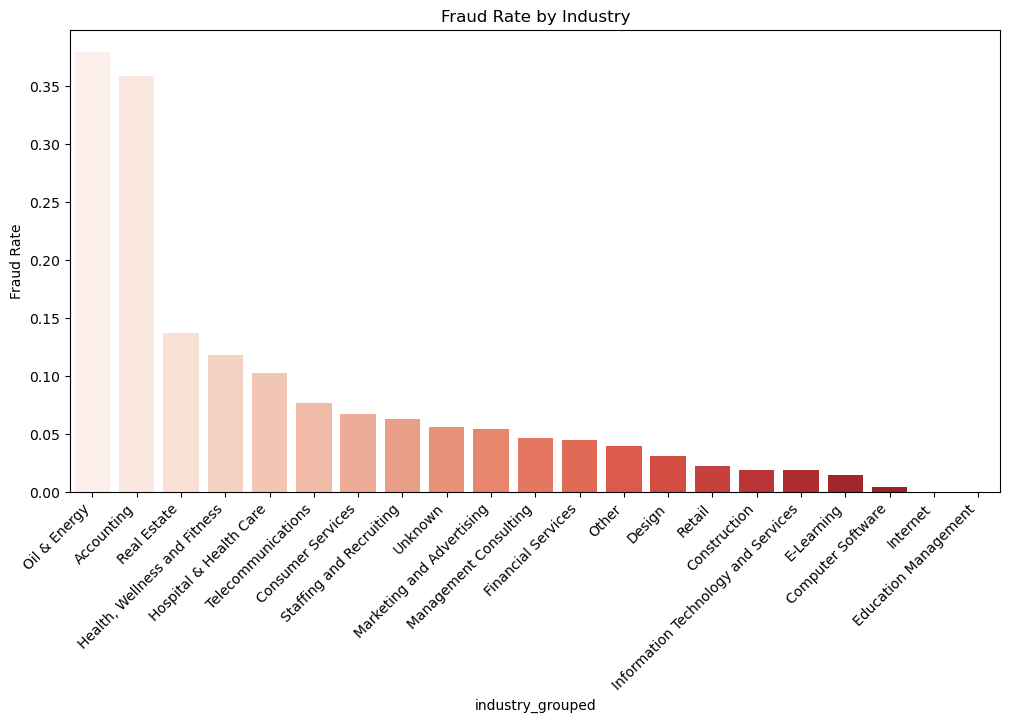

In [78]:
plt.figure(figsize=(12,6))
sns.barplot(
    data=industry_summary,
    x='industry_grouped',
    y='fraud_rate',
    palette='Reds'
)
plt.xticks(rotation=45, ha='right')
plt.ylabel('Fraud Rate')
plt.title('Fraud Rate by Industry')
plt.show()

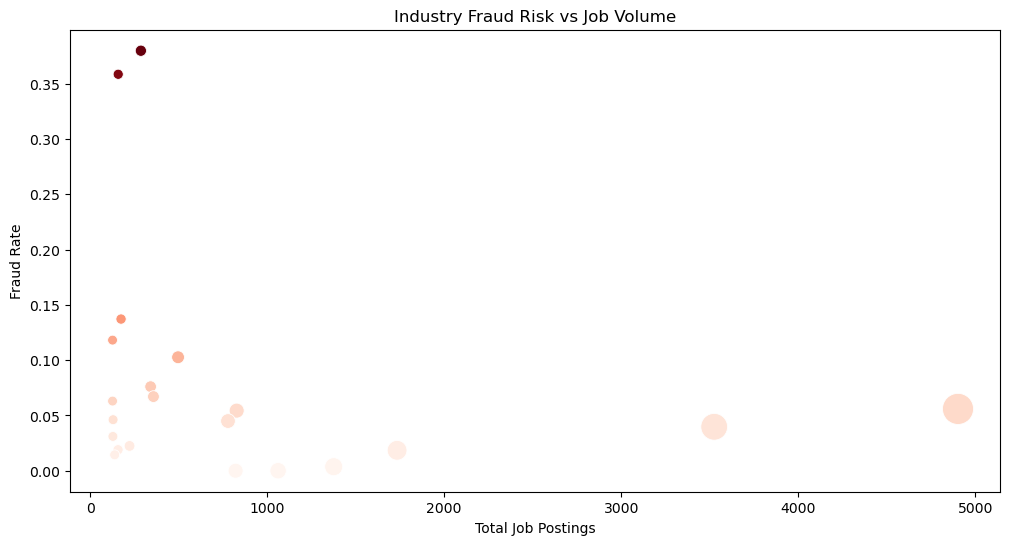

In [79]:
plt.figure(figsize=(12,6))
sns.scatterplot(
    data=industry_summary,
    x='total_jobs',
    y='fraud_rate',
    size='total_jobs',
    hue='fraud_rate',
    palette='Reds',
    sizes=(50, 500),
    legend=False
)
plt.xlabel('Total Job Postings')
plt.ylabel('Fraud Rate')
plt.title('Industry Fraud Risk vs Job Volume')
plt.show()

Overall fraud rate: 4.84%


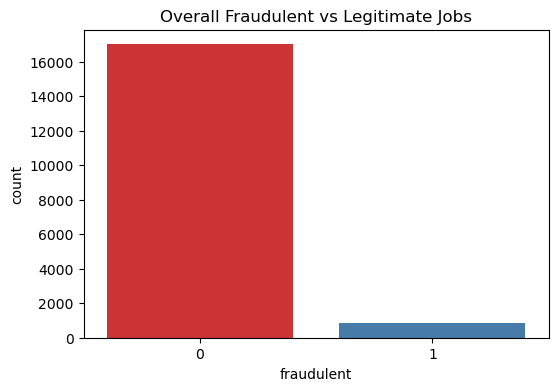

In [80]:
# Overall fraud rate
fraud_rate = df['fraudulent'].mean()
print(f"Overall fraud rate: {fraud_rate:.2%}")

# Count plot
plt.figure(figsize=(6,4))
sns.countplot(x='fraudulent', data=df, palette='Set1')
plt.title('Overall Fraudulent vs Legitimate Jobs')
plt.show()



Fraud rate vs missing_department:
missing_department
0    0.052906
1    0.045899
Name: fraudulent, dtype: float64


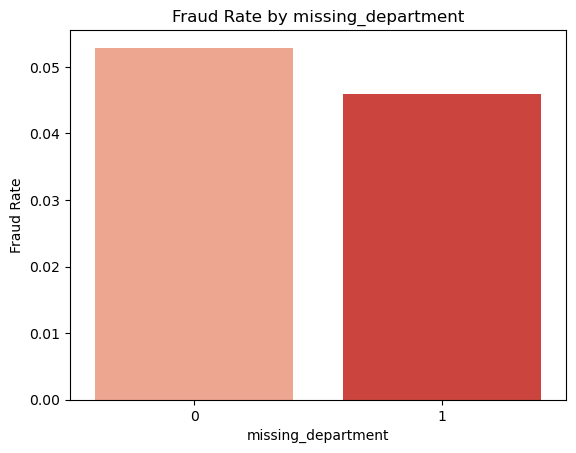


Fraud rate vs salary_missing_flag:
salary_missing_flag
0    0.077755
1    0.042769
Name: fraudulent, dtype: float64


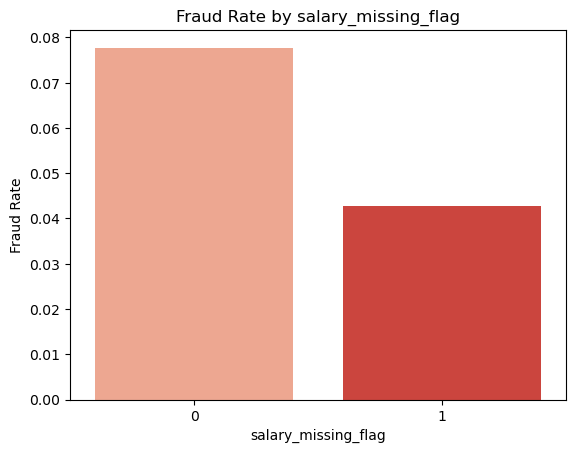

In [81]:
missing_flags = [
    'missing_department',
    'salary_missing_flag'
]

for col in missing_flags:
    rate = df.groupby(col)['fraudulent'].mean()
    print(f"\nFraud rate vs {col}:\n{rate}")
    
    sns.barplot(x=rate.index, y=rate.values, palette='Reds')
    plt.title(f'Fraud Rate by {col}')
    plt.ylabel('Fraud Rate')
    plt.show()



Fraud rate vs salary_too_low_flag:
salary_too_low_flag
0    0.047834
1    0.076696
Name: fraudulent, dtype: float64


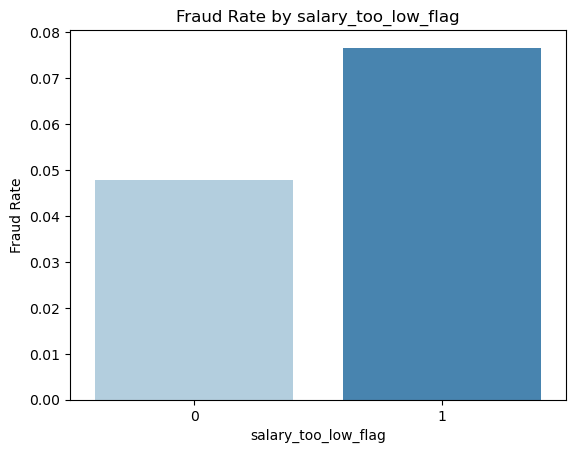


Fraud rate vs salary_equal_bounds_flag:
salary_equal_bounds_flag
0    0.048654
1    0.030189
Name: fraudulent, dtype: float64


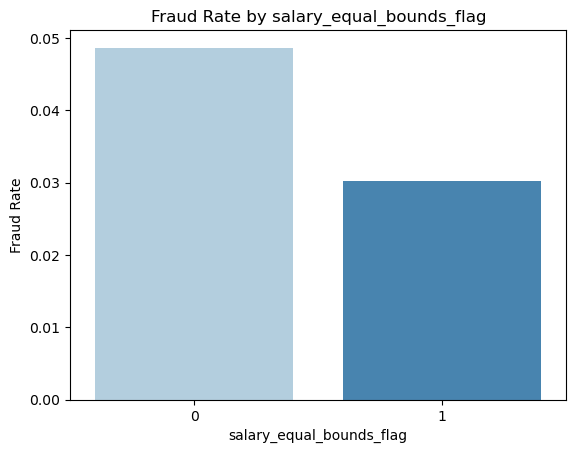


Fraud rate vs salary_mixed_scale_flag:
salary_mixed_scale_flag
0    0.048118
1    0.222222
Name: fraudulent, dtype: float64


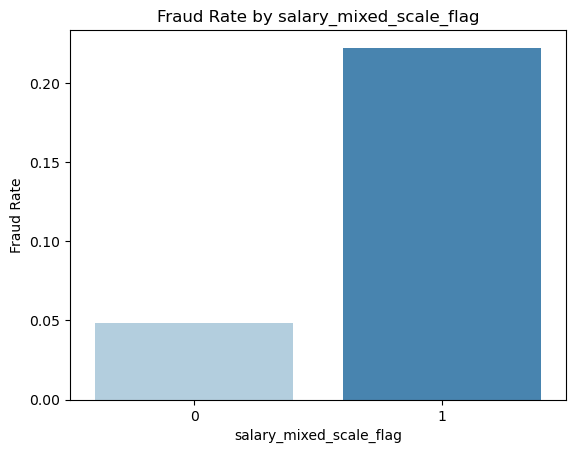


Fraud rate vs salary_too_high_flag:
salary_too_high_flag
0    0.047943
1    0.166667
Name: fraudulent, dtype: float64


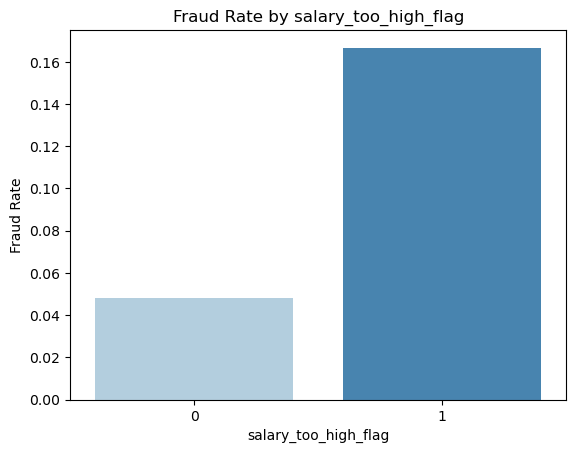


Fraud rate vs salary_fraud_signal_count:
salary_fraud_signal_count
0    0.076522
1    0.044346
2    0.032258
Name: fraudulent, dtype: float64


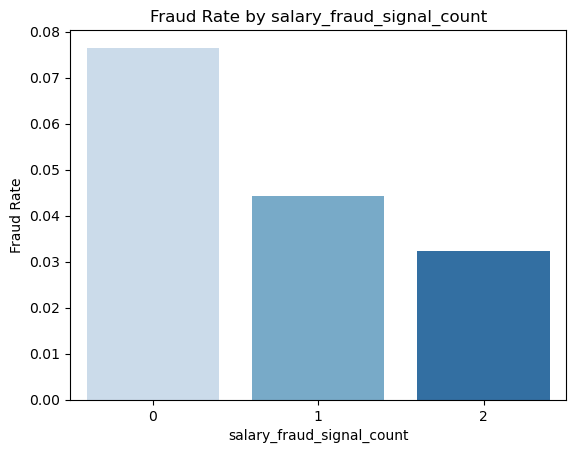

In [82]:
salary_flags = [
    'salary_too_low_flag',
    'salary_equal_bounds_flag',
    'salary_mixed_scale_flag',
    'salary_too_high_flag',
    'salary_fraud_signal_count'
]

for col in salary_flags:
    rate = df.groupby(col)['fraudulent'].mean()
    print(f"\nFraud rate vs {col}:\n{rate}")
    
    sns.barplot(x=rate.index, y=rate.values, palette='Blues')
    plt.title(f'Fraud Rate by {col}')
    plt.ylabel('Fraud Rate')
    plt.show()


In [83]:
df['salary_fraud_signal_count'].unique()

array([1, 0, 2], dtype=int64)

In [87]:
df.to_pickle("data/cleaned_data.pkl")

In [85]:
df['industry'].unique()

array(['Unknown', 'Marketing and Advertising', 'Computer Software',
       'Hospital & Health Care', 'Online Media',
       'Information Technology and Services', 'Financial Services',
       'Management Consulting', 'Events Services', 'Internet',
       'Facilities Services', 'Consumer Electronics',
       'Telecommunications', 'Consumer Services', 'Construction',
       'Oil & Energy', 'Education Management', 'Building Materials',
       'Banking', 'Food & Beverages', 'Food Production',
       'Health, Wellness and Fitness', 'Insurance', 'E-Learning',
       'Cosmetics', 'Staffing and Recruiting',
       'Venture Capital & Private Equity', 'Leisure, Travel & Tourism',
       'Human Resources', 'Pharmaceuticals', 'Farming', 'Legal Services',
       'Luxury Goods & Jewelry', 'Machinery', 'Real Estate',
       'Mechanical or Industrial Engineering',
       'Public Relations and Communications', 'Consumer Goods',
       'Medical Practice', 'Electrical/Electronic Manufacturing',
       'H

In [86]:
df = df.drop(columns='industry')